<a href="https://colab.research.google.com/github/Daeijavad/Machine_Learning_HW/blob/main/HW5_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
data = pd.read_csv("tak5data.csv",index_col = "order")

t = data["pass"]
X = data.drop(["pass"],axis =1)
X2 = data.loc[:,['midterm','finalterm']]
data.head()

,midterm,finalterm,tak1,tak2,research,project,pass
order,,,,,,,
1,20,20,20,20,20,20,1
2,15,12,15,20,17,16,1
3,19,18,20,17,18,18,1
4,9,10,13,17,18,19,1
5,17,16,17,15,16,14,1


# Question 2

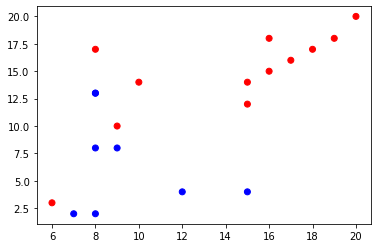

In [ ]:
cc = ['blue' if x==-1 else 'red' for x in t]
plt.scatter(X2['midterm'], X2['finalterm'], c= cc)

# Questoin 3
## way one for X:

In [ ]:
clf = LogisticRegression(max_iter = 1000).fit(X, t)

X_predict_logreg = clf.predict(X)

print("t is:         ", t.values)
print("prediction is:", X_predict_logreg)
print("The Acuraccy is:", clf.score(X, t))

t is:          [ 1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1]
prediction is: [ 1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1]
The Acuraccy is: 0.9


## way one for X2:

In [ ]:
clf = LogisticRegression(max_iter = 1000).fit(X2, t)

X2_predict_logreg = clf.predict(X2)

print("t is:         ", t.values)
print("prediction is:", X2_predict_logreg)
print("The Acuraccy is:", clf.score(X2, t))

t is:          [ 1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1]
prediction is: [ 1  1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1]
The Acuraccy is: 0.8


## way two for X:

In [ ]:
kf = KFold(n_splits=20)
predict = np.zeros(20, dtype = int)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    t_train, t_test = t.iloc[train_index], t.iloc[test_index]
    clf = LogisticRegression(max_iter = 1000).fit(X_train, t_train)
    predict[test_index] = clf.predict(X_test)
    
print("t is:         ", t.values)
print("prediction is:", predict)
print("The Acuraccy is:", sum(t.values == predict)/20)

t is:          [ 1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1]
prediction is: [ 1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1 -1]
The Acuraccy is: 0.7


## way two for X2:

In [ ]:
kf = KFold(n_splits=20)
predict = np.zeros(20, dtype = int)
for train_index, test_index in kf.split(X):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    t_train, t_test = t.iloc[train_index], t.iloc[test_index]
    clf = LogisticRegression(max_iter = 1000).fit(X_train, t_train)
    predict[test_index] = clf.predict(X_test)
    
print("t is:         ", t.values)
print("prediction is:", predict)
print("The Acuraccy is:", sum(t.values == predict)/20)

t is:          [ 1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1]
prediction is: [ 1  1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1]
The Acuraccy is: 0.75


# Question 4

## way one for X:

In [ ]:
clf = LinearSVC(max_iter = 100000).fit(X, t)

X_predict_SVM = clf.predict(X)

print("t is:         ", t.values)
print("prediction is:", X_predict_SVM)
print("The Acuraccy is:", clf.score(X, t))

t is:          [ 1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1]
prediction is: [ 1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1]
The Acuraccy is: 0.85


## way one for X2:

In [ ]:
clf = LinearSVC(max_iter = 100000).fit(X2, t)

X2_predict_SVM = clf.predict(X2)

print("t is:         ", t.values)
print("prediction is:", X2_predict_SVM)
print("The Acuraccy is:", clf.score(X2, t))

t is:          [ 1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1]
prediction is: [ 1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1]
The Acuraccy is: 0.85


# Question 5
### X2 and SVM

In [ ]:
target_names = ['not pass(-1)', 'pass(1)']
print(classification_report(t, X2_predict_SVM, target_names=target_names))
print(confusion_matrix(t, X2_predict_SVM))

              precision    recall  f1-score   support

not pass(-1)       0.86      0.75      0.80         8
     pass(1)       0.85      0.92      0.88        12

    accuracy                           0.85        20
   macro avg       0.85      0.83      0.84        20
weighted avg       0.85      0.85      0.85        20

[[ 6  2]
 [ 1 11]]


### X2 and logistic regression

In [ ]:
target_names = ['not pass(-1)', 'pass(1)']
print(classification_report(t, X2_predict_logreg, target_names=target_names))
print(confusion_matrix(t, X2_predict_logreg))

              precision    recall  f1-score   support

not pass(-1)       0.75      0.75      0.75         8
     pass(1)       0.83      0.83      0.83        12

    accuracy                           0.80        20
   macro avg       0.79      0.79      0.79        20
weighted avg       0.80      0.80      0.80        20

[[ 6  2]
 [ 2 10]]


### X and SVM

In [ ]:
target_names = ['not pass(-1)', 'pass(1)']
print(classification_report(t, X_predict_SVM, target_names=target_names))
print(confusion_matrix(t, X_predict_SVM))

              precision    recall  f1-score   support

not pass(-1)       0.86      0.75      0.80         8
     pass(1)       0.85      0.92      0.88        12

    accuracy                           0.85        20
   macro avg       0.85      0.83      0.84        20
weighted avg       0.85      0.85      0.85        20

[[ 6  2]
 [ 1 11]]


### X and logistic regression

In [ ]:
target_names = ['not pass(-1)', 'pass(1)']
print(classification_report(t, X_predict_logreg, target_names=target_names))
print(confusion_matrix(t, X_predict_logreg))

              precision    recall  f1-score   support

not pass(-1)       0.88      0.88      0.88         8
     pass(1)       0.92      0.92      0.92        12

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

[[ 7  1]
 [ 1 11]]


# Question 6
### X2 and logistic regression

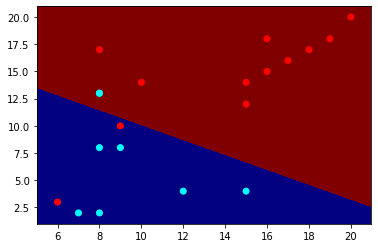

In [ ]:
clf = LogisticRegression(max_iter = 1000).fit(X2, t)

x_min, x_max = X2['midterm'].min() - 1, X2['midterm'].max() + 1
y_min, y_max = X2['finalterm'].min() - 1, X2['finalterm'].max() + 1
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='jet')
cc = ['aqua' if x==-1 else 'red' for x in t]
plt.scatter(X2['midterm'] , X2['finalterm'], c= cc)

### X2 and SVM

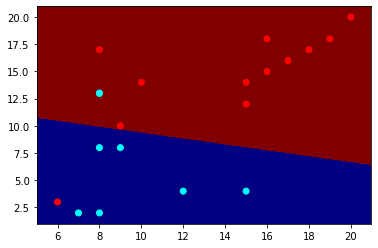

In [ ]:
clf = LinearSVC(max_iter = 1000000).fit(X2, t)

x_min, x_max = X2['midterm'].min() - 1, X2['midterm'].max() + 1
y_min, y_max = X2['finalterm'].min() - 1, X2['finalterm'].max() + 1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='jet')
cc = ['aqua' if x==-1 else 'red' for x in t]
plt.scatter(X2['midterm'] , X2['finalterm'], c= cc)